In [ ]:
import numpy as np
import os
import torch
from torchvision import datasets, transforms, models
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import zipfile
from torch.utils.data import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
cd '/content/drive/MyDrive/B19EE046_Q1'

/content/drive/MyDrive/B19EE046_Q1


In [ ]:
train_dataset = datasets.MNIST('/content/drive/MyDrive/B19EE046_Q1', train=True, download=True)
test_dataset  = datasets.MNIST('/content/drive/MyDrive/B19EE046_Q1', train=False, download=True)
train_transform = transforms.Compose([transforms.ToTensor(),])
test_transform = transforms.Compose([transforms.ToTensor(),])

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/B19EE046_Q1/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/B19EE046_Q1/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/B19EE046_Q1/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/B19EE046_Q1/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/B19EE046_Q1/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/B19EE046_Q1/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/B19EE046_Q1/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/B19EE046_Q1/MNIST/raw



In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/B19EE046_Q1/digit-recognizer.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive/B19EE046_Q1')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/B19EE046_Q1/train.csv')

In [ ]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_label = train['label']
train_data = train.drop(columns=['label'])
train_data = (train_data.values.reshape(-1,28,28))/255.0

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/B19EE046_Q1/test.csv')
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = (test.values.reshape(-1,28,28))/255.0

In [ ]:
train_data = torch.Tensor(train_data)
test_data = torch.Tensor(test_data)

In [ ]:
batch_size = 16
train_dl = DataLoader(train_data, batch_size, shuffle = True)

In [ ]:
test_dl = DataLoader(test_data, batch_size, shuffle = False)

In [ ]:
def noise_gen(batch_size, dim, choice='gaussian'):
  if choice=='gaussian':
    return torch.randn(batch_size, dim)
  if choice=='random':
    return torch.rand(batch_size, dim)
  else:
    pass

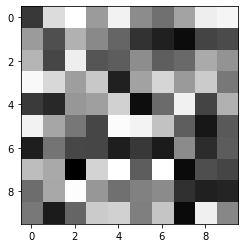

In [ ]:
a1 = noise_gen(64, 100, 'random')
b1 = a1[2]
b1 = b1.reshape(10, 10)
b1 = b1.numpy()
plt.imshow(b1, cmap = 'gray')

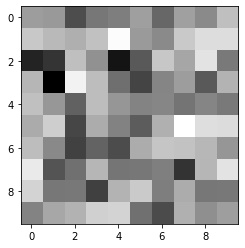

In [ ]:
a2 = noise_gen(64, 100, 'gaussian')
b2 = a2[2]
b2 = b2.reshape(10, 10)
b2 = b2.numpy()
plt.imshow(b2, cmap = 'gray')

In [ ]:
vgg_model = models.vgg16(pretrained=True).cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
import torch.nn.functional as F

class Discriminator(torch.nn.Module):
    
    def __init__(self, vgg_model):
        super().__init__()
        self.vgg_layers = vgg_model.features
        self.conv0 = torch.nn.Conv2d(1, 32, kernel_size = 3, stride = 2, padding = 1)
        self.conv0_drop = torch.nn.Dropout2d(0.25)
        self.conv1 = torch.nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv1_drop = torch.nn.Dropout2d(0.25)
        self.conv2 = torch.nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1)
        self.conv2_drop = torch.nn.Dropout2d(0.25)
        self.conv3 = torch.nn.Conv2d(128, 256, kernel_size = 3, stride = 2, padding = 1)
        self.conv3_drop = torch.nn.Dropout2d(0.25)
        self.fc = torch.nn.Linear(12544, 1)
    
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = F.leaky_relu(self.conv0(x), 0.1)
        x = self.conv0_drop(x)
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = self.conv1_drop(x)
        x = F.leaky_relu(self.conv2(x), 0.3)
        x = self.conv2_drop(x)
        x = F.leaky_relu(self.conv3(x), 0.4)
        x = self.conv3_drop(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
class Generator(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc = torch.nn.Linear(100, 256*7*7)
        self.trans_conv1 = torch.nn.ConvTranspose2d(256, 128, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
        self.trans_conv2 = torch.nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 1, padding = 1)
        self.trans_conv3 = torch.nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1, padding = 1)
        self.trans_conv4 = torch.nn.ConvTranspose2d(32, 1, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
    
    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 256, 7, 7)
        x = F.leaky_relu(self.trans_conv1(x),0.15)
        x = F.leaky_relu(self.trans_conv2(x),0.2)
        x = F.leaky_relu(self.trans_conv3(x),0.25)
        x = self.trans_conv4(x)
        x = torch.tanh(x)
        return x        

In [ ]:
D = Discriminator(vgg_model).float().cuda()
G = Generator().float().cuda()

In [ ]:
Loss = torch.nn.BCEWithLogitsLoss().cuda()
optimizerD = torch.optim.Adam(D.parameters())
optimizerG = torch.optim.Adam(G.parameters())

In [ ]:
G_losses_g1 = []
D_losses_g1 = []

for epoch in range(25):
  for inp_img in tqdm(train_dl):
    inp_img = inp_img.cuda()
    fak_img = noise_gen(16,100,'gaussian').cuda().float()
    fak_lab = torch.zeros(16,1).cuda()
    inp_lab = torch.ones(16,1).cuda()
    D.zero_grad()
    out_real = D(inp_img)
    error_real = Loss(out_real.type(torch.float32), inp_lab.type(torch.float32))
    error_real.backward()
    D_x = out_real.mean().item()
    out_inp = D(G(fak_img))
    error_inp = Loss(out_inp.type(torch.float32), fak_lab.type(torch.float32))
    error_inp.backward()
    D_G_z1 = out_inp.mean().item()
    error = error_real + error_inp
    optimizerD.step()
    output = D(inp_img)
    errG = Loss(output.type(torch.float32), inp_lab.type(torch.float32))
    errG.backward()
    D_G_z2 = output.mean().item()
    optimizerG.step()
    G_losses_g1.append(errG.item())
    D_losses_g1.append(error.item())

100%|██████████| 2625/2625 [00:30<00:00, 86.61it/s]


In [ ]:
D1 = Discriminator(vgg_model).float().cuda()
G1 = Generator().float().cuda()
optimizerD1 = torch.optim.Adam(D1.parameters())
optimizerG1 = torch.optim.Adam(G1.parameters())

G_losses_r1 = []
D_losses_r1 = []

for epoch in range(25):
  for inp_img in tqdm(train_dl):
    inp_img = inp_img.cuda()
    fak_img = noise_gen(16,100,'random').cuda().float()
    fak_lab = torch.zeros(16,1).cuda()
    inp_lab = torch.ones(16,1).cuda()
    D1.zero_grad()
    out_real = D1(inp_img)
    error_real = Loss(out_real.type(torch.float32), inp_lab.type(torch.float32))
    error_real.backward()
    D_x = out_real.mean().item()
    out_inp = D1(G1(fak_img))
    error_inp = Loss(out_inp.type(torch.float32), fak_lab.type(torch.float32))
    error_inp.backward()
    D_G_z1 = out_inp.mean().item()
    error = error_real + error_inp
    optimizerD1.step()
    output = D1(inp_img)
    errG = Loss(output.type(torch.float32), inp_lab.type(torch.float32))
    errG.backward()
    D_G_z2 = output.mean().item()
    optimizerG1.step()
    G_losses_r1.append(errG.item())
    D_losses_r1.append(error.item())

100%|██████████| 2625/2625 [00:30<00:00, 87.18it/s]


In [ ]:
D2 = Discriminator(vgg_model).float().cuda()
G2 = Generator().float().cuda()
optimizerD2 = torch.optim.Adam(D2.parameters())
optimizerG2 = torch.optim.Adam(G2.parameters())

G_losses_g2 = []
D_losses_g2 = []

for epoch in range(50):
  for inp_img in tqdm(train_dl):
    inp_img = inp_img.cuda()
    fak_img = noise_gen(16,100,'gaussian').cuda().float()
    fak_lab = torch.zeros(16,1).cuda()
    inp_lab = torch.ones(16,1).cuda()
    D2.zero_grad()
    out_real = D2(inp_img)
    error_real = Loss(out_real.type(torch.float32), inp_lab.type(torch.float32))
    error_real.backward()
    D_x = out_real.mean().item()
    out_inp = D2(G2(fak_img))
    error_inp = Loss(out_inp.type(torch.float32), fak_lab.type(torch.float32))
    error_inp.backward()
    D_G_z1 = out_inp.mean().item()
    error = error_real + error_inp
    optimizerD2.step()
    output = D2(inp_img)
    errG = Loss(output.type(torch.float32), inp_lab.type(torch.float32))
    errG.backward()
    D_G_z2 = output.mean().item()
    optimizerG2.step()
    G_losses_g2.append(errG.item())
    D_losses_g2.append(error.item())

100%|██████████| 2625/2625 [00:29<00:00, 87.98it/s]


In [ ]:
D3 = Discriminator(vgg_model).float().cuda()
G3 = Generator().float().cuda()
optimizerD3 = torch.optim.Adam(D3.parameters())
optimizerG3 = torch.optim.Adam(G3.parameters())

G_losses_r2 = []
D_losses_r2 = []

for epoch in range(50):
  for inp_img in tqdm(train_dl):
    inp_img = inp_img.cuda()
    fak_img = noise_gen(16,100,'random').cuda().float()
    fak_lab = torch.zeros(16,1).cuda()
    inp_lab = torch.ones(16,1).cuda()
    D3.zero_grad()
    out_real = D3(inp_img)
    error_real = Loss(out_real.type(torch.float32), inp_lab.type(torch.float32))
    error_real.backward()
    D_x = out_real.mean().item()
    out_inp = D3(G3(fak_img))
    error_inp = Loss(out_inp.type(torch.float32), fak_lab.type(torch.float32))
    error_inp.backward()
    D_G_z1 = out_inp.mean().item()
    error = error_real + error_inp
    optimizerD3.step()
    output = D3(inp_img)
    errG = Loss(output.type(torch.float32), inp_lab.type(torch.float32))
    errG.backward()
    D_G_z2 = output.mean().item()
    optimizerG3.step()
    G_losses_r2.append(errG.item())
    D_losses_r2.append(error.item())

100%|██████████| 2625/2625 [00:30<00:00, 85.80it/s]


In [ ]:
D4 = Discriminator(vgg_model).float().cuda()
G4 = Generator().float().cuda()
optimizerD4 = torch.optim.Adam(D4.parameters())
optimizerG4 = torch.optim.Adam(G4.parameters())

G_losses_g3 = []
D_losses_g3 = []

for epoch in range(100):
  for inp_img in tqdm(train_dl):
    inp_img = inp_img.cuda()
    fak_img = noise_gen(16,100,'gaussian').cuda().float()
    fak_lab = torch.zeros(16,1).cuda()
    inp_lab = torch.ones(16,1).cuda()
    D4.zero_grad()
    out_real = D4(inp_img)
    error_real = Loss(out_real.type(torch.float32), inp_lab.type(torch.float32))
    error_real.backward()
    D_x = out_real.mean().item()
    out_inp = D4(G4(fak_img))
    error_inp = Loss(out_inp.type(torch.float32), fak_lab.type(torch.float32))
    error_inp.backward()
    D_G_z1 = out_inp.mean().item()
    error = error_real + error_inp
    optimizerD4.step()
    output = D4(inp_img)
    errG = Loss(output.type(torch.float32), inp_lab.type(torch.float32))
    errG.backward()
    D_G_z2 = output.mean().item()
    optimizerG4.step()
    G_losses_g3.append(errG.item())
    D_losses_g3.append(error.item())

100%|██████████| 2625/2625 [00:31<00:00, 84.59it/s]


In [ ]:
D5 = Discriminator(vgg_model).float().cuda()
G5 = Generator().float().cuda()
optimizerD5 = torch.optim.Adam(D5.parameters())
optimizerG5 = torch.optim.Adam(G5.parameters())

G_losses_r3 = []
D_losses_r3 = []

for epoch in range(100):
  for inp_img in tqdm(train_dl):
    inp_img = inp_img.cuda()
    fak_img = noise_gen(16,100,'random').cuda().float()
    fak_lab = torch.zeros(16,1).cuda()
    inp_lab = torch.ones(16,1).cuda()
    D5.zero_grad()
    out_real = D5(inp_img)
    error_real = Loss(out_real.type(torch.float32), inp_lab.type(torch.float32))
    error_real.backward()
    D_x = out_real.mean().item()
    out_inp = D5(G5(fak_img))
    error_inp = Loss(out_inp.type(torch.float32), fak_lab.type(torch.float32))
    error_inp.backward()
    D_G_z1 = out_inp.mean().item()
    error = error_real + error_inp
    optimizerD5.step()
    output = D5(inp_img)
    errG = Loss(output.type(torch.float32), inp_lab.type(torch.float32))
    errG.backward()
    D_G_z2 = output.mean().item()
    optimizerG5.step()
    G_losses_r3.append(errG.item())
    D_losses_r3.append(error.item())

100%|██████████| 2625/2625 [00:30<00:00, 87.20it/s]


In [ ]:
def generate_image(gen_network, num_images, choice):
  for i in range(num_images):
    noise_vector = (noise_gen(1,100,choice)/255.0).cuda().float()
    output = gen_network(noise_vector)
    plt.figure()
    plt.imshow(output.data.cpu().numpy().reshape(28,28), cmap='Greys')

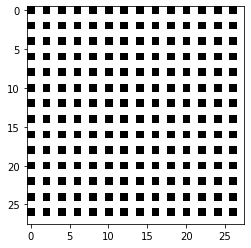

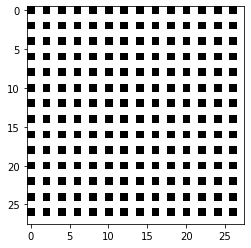

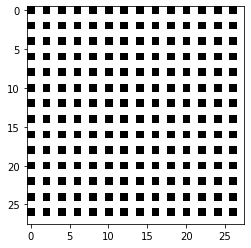

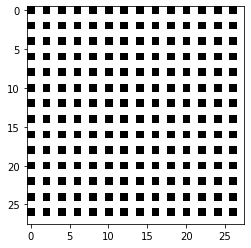

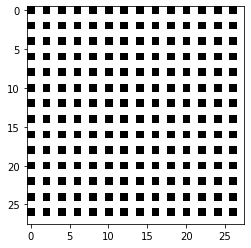

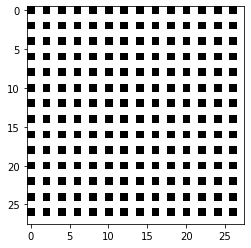

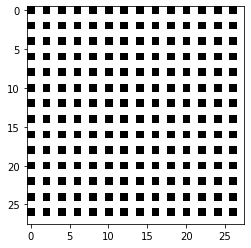

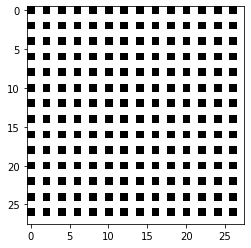

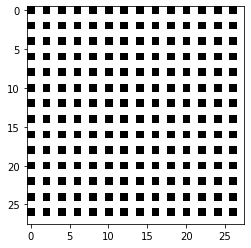

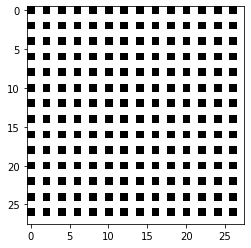

In [ ]:
generate_image(G, 10, 'gaussian')

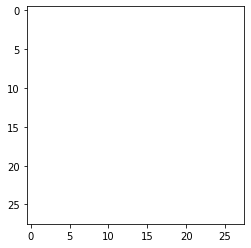

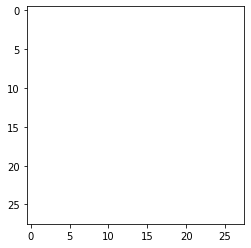

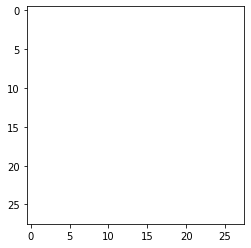

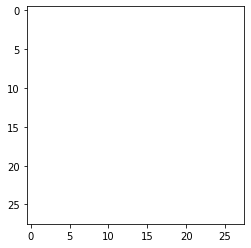

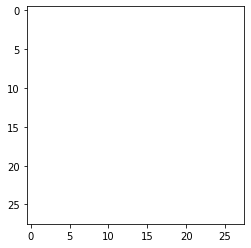

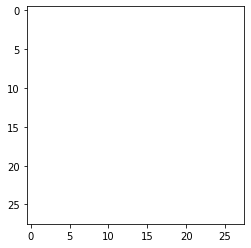

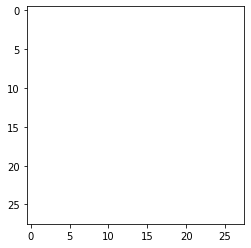

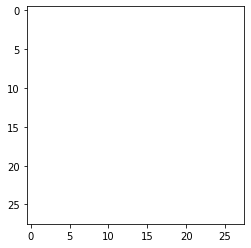

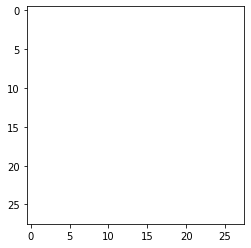

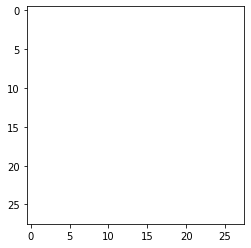

In [ ]:
generate_image(G1, 10, 'random')

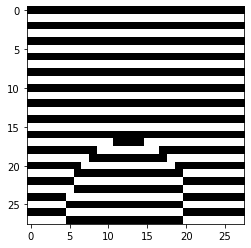

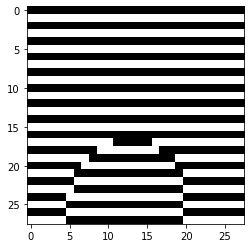

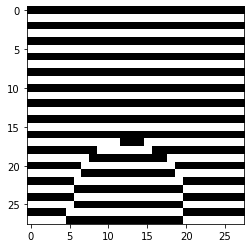

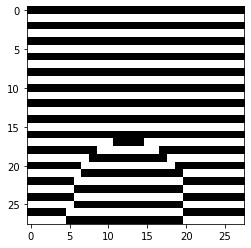

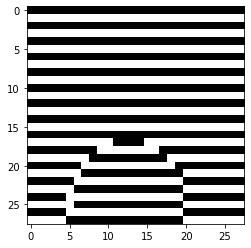

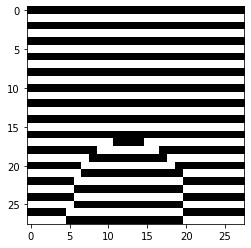

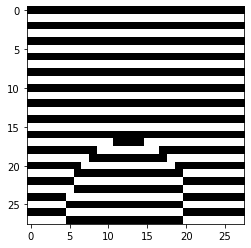

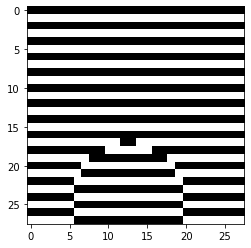

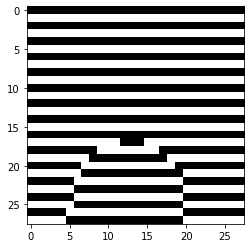

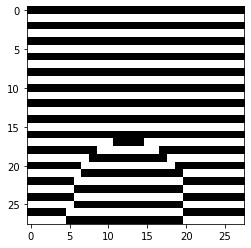

In [ ]:
generate_image(G2, 10, 'gaussian')

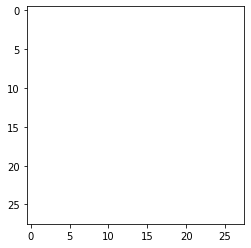

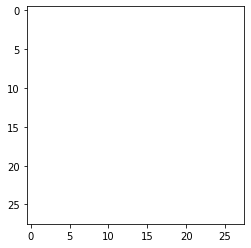

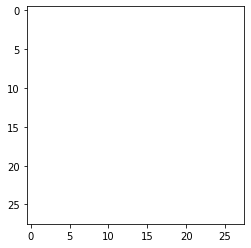

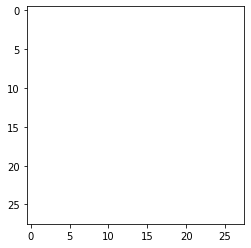

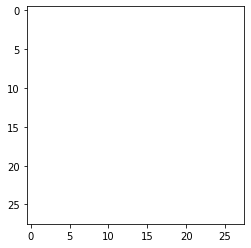

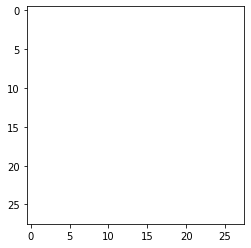

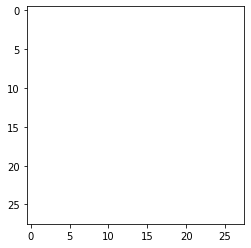

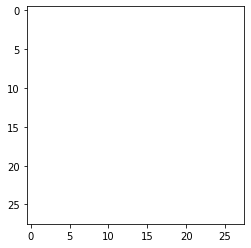

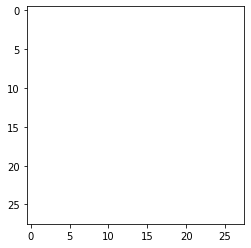

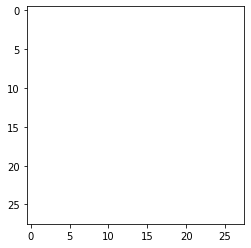

In [ ]:
generate_image(G3, 10, 'random')

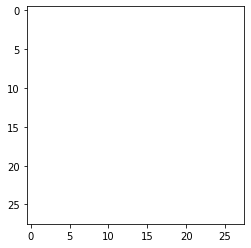

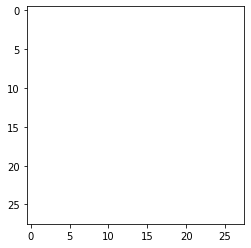

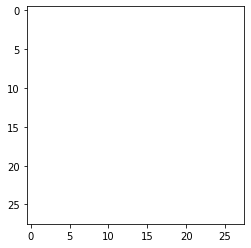

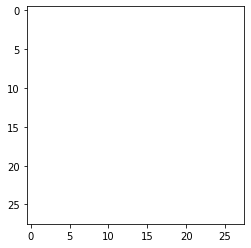

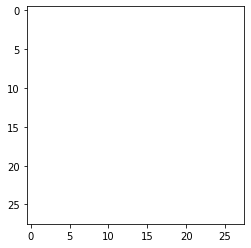

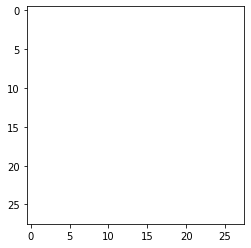

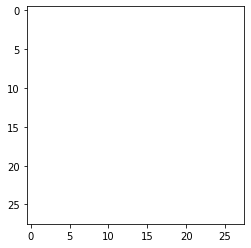

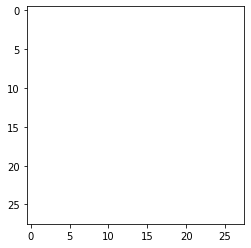

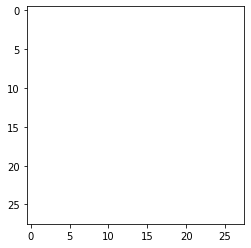

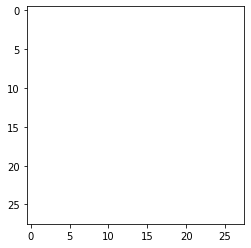

In [ ]:
generate_image(G4, 10, 'gaussian')

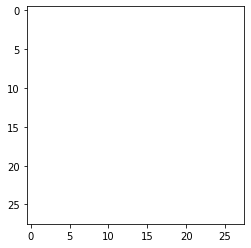

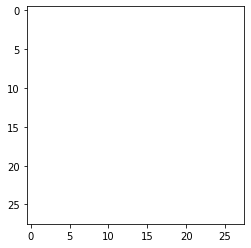

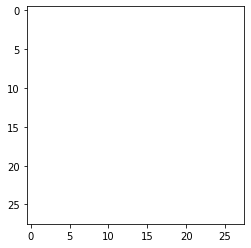

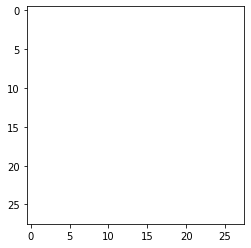

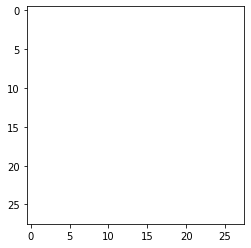

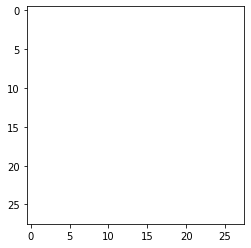

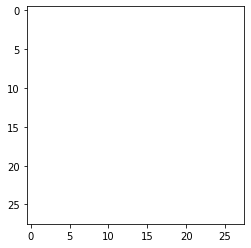

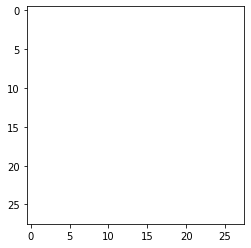

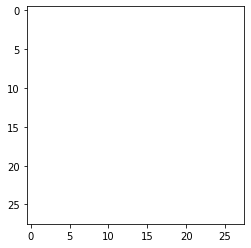

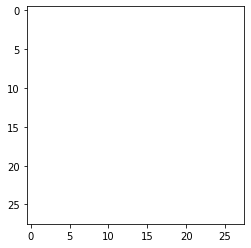

In [ ]:
generate_image(G5, 10, 'random')

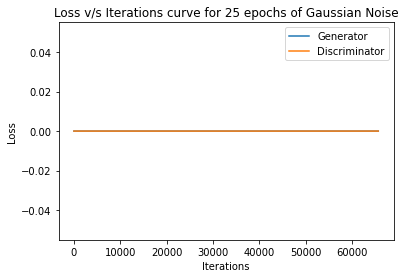

In [ ]:
plt.title("Loss v/s Iterations curve for 25 epochs of Gaussian Noise")
plt.plot([n for n in range(0,len(G_losses_g1))], G_losses_g1)
plt.plot([n for n in range(0,len(D_losses_g1))], D_losses_g1)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["Generator","Discriminator"])
plt.show()

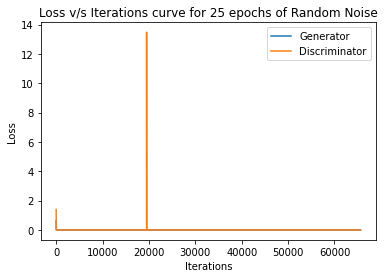

In [ ]:
plt.title("Loss v/s Iterations curve for 25 epochs of Random Noise")
plt.plot([n for n in range(0,len(G_losses_r1))], G_losses_r1)
plt.plot([n for n in range(0,len(D_losses_r1))], D_losses_r1)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["Generator","Discriminator"])
plt.show()

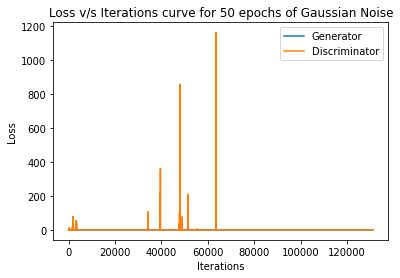

In [ ]:
plt.title("Loss v/s Iterations curve for 50 epochs of Gaussian Noise")
plt.plot([n for n in range(0,len(G_losses_g2))], G_losses_g2)
plt.plot([n for n in range(0,len(D_losses_g2))], D_losses_g2)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["Generator","Discriminator"])
plt.show()

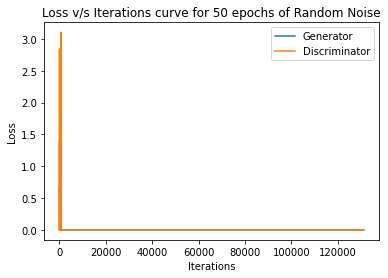

In [ ]:
plt.title("Loss v/s Iterations curve for 50 epochs of Random Noise")
plt.plot([n for n in range(0,len(G_losses_r2))], G_losses_r2)
plt.plot([n for n in range(0,len(D_losses_r2))], D_losses_r2)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["Generator","Discriminator"])
plt.show()

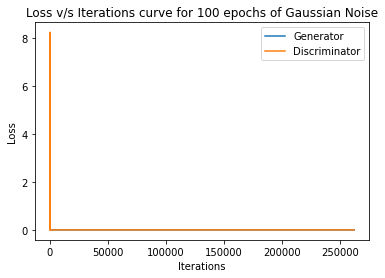

In [ ]:
plt.title("Loss v/s Iterations curve for 100 epochs of Gaussian Noise")
plt.plot([n for n in range(0,len(G_losses_g3))], G_losses_g3)
plt.plot([n for n in range(0,len(D_losses_g3))], D_losses_g3)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["Generator","Discriminator"])
plt.show()

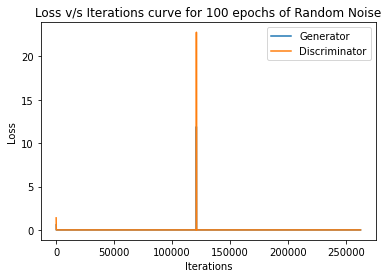

In [ ]:
plt.title("Loss v/s Iterations curve for 100 epochs of Random Noise")
plt.plot([n for n in range(0,len(G_losses_r3))], G_losses_r3)
plt.plot([n for n in range(0,len(D_losses_r3))], D_losses_r3)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["Generator","Discriminator"])
plt.show()

In [ ]:
train_data_class_9 = train[train['label']==9]
train_data_class_9

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41962,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41969,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41975,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#train_data_class_9 = train_data_class_9.drop(columns=['label'])
#train_data_class_9 = (train_data_class_9.values.reshape(-1,28,28))/255.0
#train_data_class_9 = torch.Tensor(train_data_class_9)
batch_size = 12
train_dl_9 = DataLoader(train_data_class_9, batch_size, shuffle = True)

In [ ]:
D_9 = Discriminator(vgg_model).float().cuda()
G_9 = Generator().float().cuda()
optimizerD_9 = torch.optim.Adam(D_9.parameters())
optimizerG_9 = torch.optim.Adam(G_9.parameters())

G_losses_g4 = []
D_losses_g4 = []

for epoch in range(100):
  for inp_img in tqdm(train_dl_9):
    inp_img = inp_img.cuda()
    fak_img = noise_gen(12,100,'gaussian').cuda().float()
    fak_lab = torch.zeros(12,1).cuda()
    inp_lab = torch.ones(12,1).cuda()
    D_9.zero_grad()
    out_real = D_9(inp_img)
    error_real = Loss(out_real.type(torch.float32), inp_lab.type(torch.float32))
    error_real.backward()
    D_x = out_real.mean().item()
    out_inp = D_9(G_9(fak_img))
    error_inp = Loss(out_inp.type(torch.float32), fak_lab.type(torch.float32))
    error_inp.backward()
    D_G_z1 = out_inp.mean().item()
    error = error_real + error_inp
    optimizerD_9.step()
    output = D_9(inp_img)
    errG = Loss(output.type(torch.float32), inp_lab.type(torch.float32))
    errG.backward()
    D_G_z2 = output.mean().item()
    optimizerG_9.step()
    G_losses_g4.append(errG.item())
    D_losses_g4.append(error.item())

100%|██████████| 349/349 [00:03<00:00, 96.21it/s]


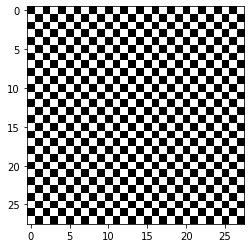

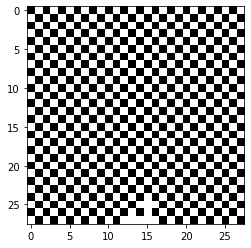

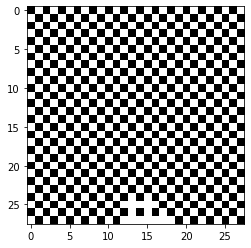

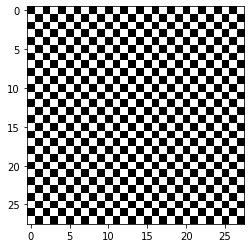

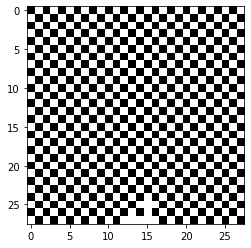

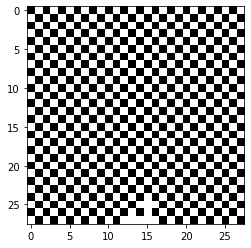

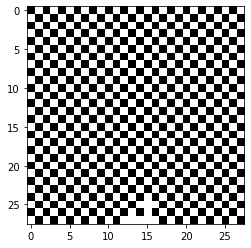

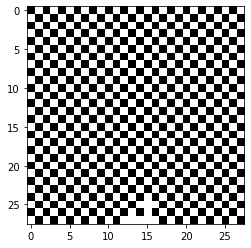

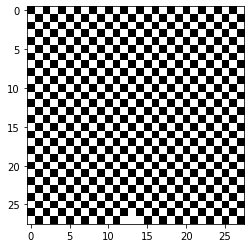

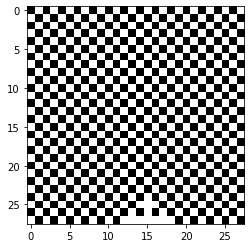

In [ ]:
generate_image(G_9, 10, 'gaussian')

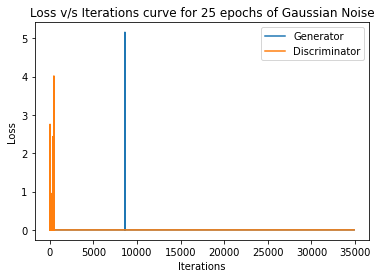

In [ ]:
plt.title("Loss v/s Iterations curve for 25 epochs of Gaussian Noise")
plt.plot([n for n in range(0,len(G_losses_g4))], G_losses_g4)
plt.plot([n for n in range(0,len(D_losses_g4))], D_losses_g4)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["Generator","Discriminator"])
plt.show()